In [3]:
import geopandas as gpd
import pandas as pd
import os

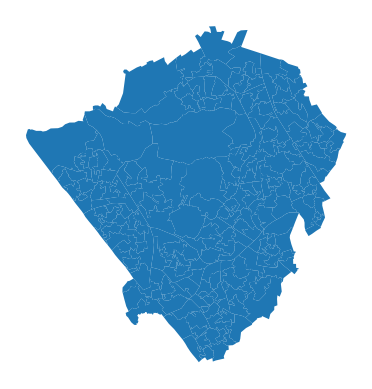

In [4]:
# Read in the data
shape = gpd.read_file(r"DC2Data/LSOAShapes/LSOA_2011_London_gen_MHW_LSOA11NM_contains_Barnet.shp")
ax = shape.plot()
ax.set_axis_off()

In [5]:
burglaries = pd.read_csv(r"DC2Data/burglary.csv")
list1 = list(shape['LSOA11CD'])
list2 = list(burglaries['LSOA code'].unique())

for i in list1:
    if i not in list2:
        print(i)


In [6]:
counts =  burglaries.groupby('LSOA code').size()
counts = counts.to_frame()
counts.columns = ['count']
counts = counts.reset_index()
counts = counts.rename(columns={'LSOA code':'LSOA11CD'})
shape = shape.merge(counts, on='LSOA11CD')

<Axes: >

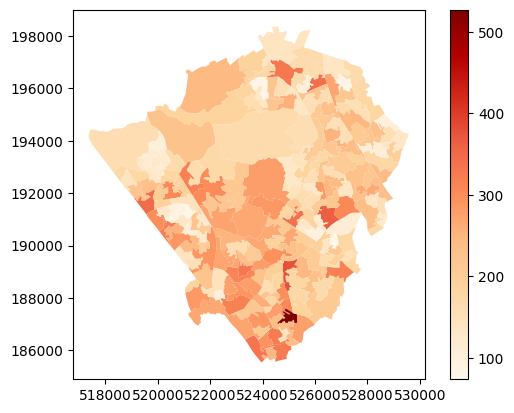

In [7]:
shape.plot(column='count', cmap='OrRd', legend=True)

43907